# **Angel_Capstone2**
## **Supermarket Customers**

## **Overview**

Dalam pasar ritel yang berkembang pesat, supermarket menghadapi tantangan yang signifikan. Dengan meningkatnya persaingan baik dari pengecer fisik maupun online, loyalitas pelanggan dipertaruhkan. Meskipun basis pelanggannya kuat, manajemen khawatir dengan penurunan angka penjualan pada kategori produk tertentu dan tanggapan kampanye yang tidak konsisten. 

## **Pernyataan Masalah**

Manajemen menyadari perlunya memanfaatkan data pelanggan secara lebih efektif untuk perkembangan supermarket kedepannya. Informasi ini akan membantu manajemen supermarket untuk memahami perilaku pembelanjaan, mengoptimalkan promosi, dan meningkatkan keterlibatan pelanggan.

Sebagai data analyst dari supermarket ini, kita akan mencoba menjawab pertanyaan berikut :

* **Bagaimana karakteristik / perilaku customer dan pola belanjanya?**
* **Apakah promosi dan kampanye sudah optimal?**
* **Bagaimana cara meningkatkan revenue?**



## **Data**

Untuk mengatasi masalah ini, supermarket telah mengumpulkan data pelanggan yang luas, termasuk demografi, riwayat pembelian, tanggapan promosi, dan preferensi saluran. 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
import nbformat
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from spicy import stats
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

Berikut adalah data yang diisi customer saat berbelanja di supermarket. Ada 29 column di dalam dataset Supermarket Customers, yaitu:

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

Berikut merupakan dataset Supermarket Customers :

In [2]:
df = pd.read_csv('Supermarket Customers.csv', delimiter = '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### **1 Data Understanding**

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*.

Pertama, mari kita lihat informasi umum dari dataset Supermarket Customers.

In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.describe(include = 'object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

Secara umum, kita bisa melihat bahwa:
* dataset hr_analytics memiliki 29 kolom dan 2.240 baris.
* kolom `Income` memiliki data kosong.
* tidak ada data duplikat.
* kolom `ID` berisikan id unik untuk tiap customer, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* kolom `Z_CostContact` dan `Z_Revenue` memiliki mean, min, max dan kuartil yang sama, sehingga memiliki kemungkinan semua nilai sama. Mari kita cek lebih detil, jika iyah maka akan dihapus karena tidak berpengaruh dalam analisis.
* `Education` merupakan data kategorik ordinal, bisa dibuatkan kolom baru berdasarkan ranking kategorinya untuk memudahkan analisis.
* beberapa data memiliki outliers yang mungkin akan mempengaruhi analisis. Mari kita cek lebih detail.

### **2 Data Cleaning**

Setelah mengetahui anomali-anomali apa saja yang terdapat di dalam dataset, kita akan masuk dalam tahapan *data cleaning*. Setiap penangan anomali yang ditangani, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.


#### **Data Outliers And Handling**

Dari tahapan sebelum nya, kita dapat menyimpulkan bahwa `Year_Birth`, `Income`, `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumWebVisitsMonth` memiliki data outliers. Tetapi kita hanya akan menangani outliers pada kolom `Year_Birth` dan `Income` karena outliers pada kolom lainnya bisa terjadi dan masuk di akal.

Berikut penanganan outliers pada kolom `Year_Birth`.

In [9]:
Q1 = df['Year_Birth'].quantile(0.25)
Q3 = df['Year_Birth'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['Year_Birth'] < lower_bound) | (df['Year_Birth'] > upper_bound)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,...,1,0,0,1,0,0,0,3,11,0


Dataset ini dikumpul pada tahun 2012 - 2014. Manusia pada umum nya dapat hidup sampai 100 tahun, maka tahun lahir tertua yang dapat terdaftar dalam data ini adalah 1912, sedangkan terdapat 3 data outliers dengan tahun lahir di bawahnya, maka kita akan drop ketiga baris ini. Langkah ini dapat dilakukan karena persentase outliers kurang dari 1% dari data dan orang berumur lebih dari 100 tahun tidak munkin berbelanja di supermarket. Kemungkinan kesalahan input data sangat besar.

In [10]:
df = df.drop([192, 239, 339]).reset_index()
df

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,...,5,0,0,0,0,0,0,3,11,0
2233,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,...,7,0,0,0,1,0,0,3,11,0
2234,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,6,0,1,0,0,0,0,3,11,0
2235,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,...,3,0,0,0,0,0,0,3,11,0


Baris dengan tahun lahir anomali telah di hapus, dataset yang berisi 2.240 baris sekarang tinggal 2.237 baris.

Selanjutnya, kita akan menangani outliers pada kolom `Income`

In [11]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,...,0,0,0,0,0,0,0,3,11,0
614,617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,...,1,0,0,0,0,0,0,3,11,0
652,655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,...,0,0,0,0,0,0,0,3,11,0
684,687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,...,0,0,0,0,0,0,0,3,11,0
1297,1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,...,1,0,0,0,0,0,0,3,11,0
1650,1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,...,1,0,0,0,0,0,0,3,11,0
2129,2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,...,0,0,0,0,0,0,0,3,11,0
2230,2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,...,6,0,0,0,0,0,0,3,11,0


<Axes: ylabel='Income'>

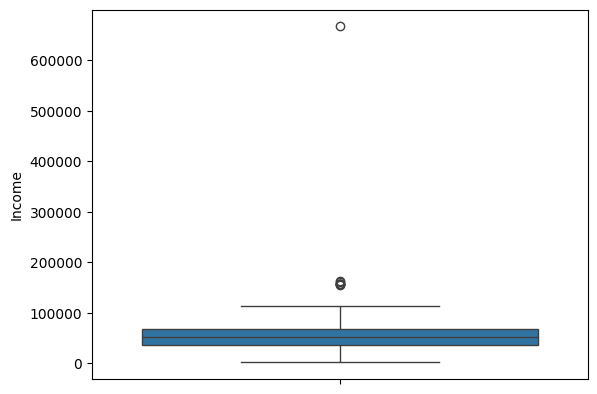

In [12]:
sns.boxplot(df['Income'])

Terdapat 8 outliers pada kolom `Income`, kita akan mengunakan metode capping. Metode ini kita gunakan untuk mempertahankan konsistensi: Pembatasan mempertahankan distribusi data asli (tanpa menyimpang banyak dari rata-rata sebenarnya), memungkinkan perbandingan dan analisis yang konsisten.

In [13]:
lower_cap = df['Income'].quantile(0.01)
upper_cap = df['Income'].quantile(0.99)

df['Income'] = df['Income'].clip(lower=lower_cap, upper=upper_cap)

<Axes: ylabel='Income'>

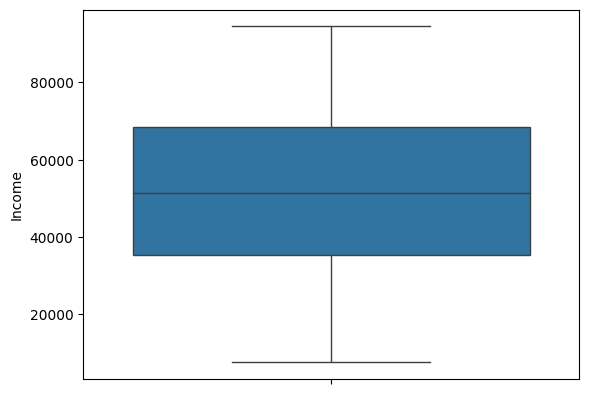

In [14]:
sns.boxplot(df['Income'])

Bisa dilihat kolom `Income` sudah tidak ada data outliers dan distribusi data asli tidak menyimpang secara signifikan.

#### **Missing Value and Handling**

Dari tahapan sebelumnya, kita mengetahui bahwa kolom `Income` memiliki data kosong. Kita akan mengisi data kosong tersebut dengan mean (rata-rata) kolom tersebut, tetapi akan di kategorikan berdasarkan `Education`, karena dari semua data yang ada, kolom yang paling berpengaruh terhadap penghasilan adalah pendidikan. Maka data kosong pada seorang sarjana akan diisi dengan rata - rata penghasilan para sarjana, dan seterusnya.

In [15]:
income_edu = df.groupby('Education')['Income'].transform('mean')

df['Income'].fillna(income_edu, inplace=True)

df.isnull().sum()


index                  0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Bisa di lihat, sudah tidak ada data kosong pada kolom `Income`

#### **Data Formatting**

Di tahapan ini kita akan merapikan data, memastikan data type sudah sesuai dan menghapus data yang tidak di perlukan.

Berikut kita akan menghapus kolom yang tidak diperlukan.

In [16]:
df['Z_CostContact'].unique()

array([3])

In [17]:
df['Z_Revenue'].unique()

array([11])

Bisa di lihat bahwa kolom `Z_CostContact` dan `Z_Revenue` memiliki satu value saja dan tidak akan mrmpengahruhi analysis, maka akan kita hapus saja.

In [18]:
df = df.drop(columns = ['Z_CostContact', 'Z_Revenue'])
df

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,...,3,4,5,0,0,0,0,0,0,0
2233,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,...,2,5,7,0,0,0,1,0,0,0
2234,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,3,13,6,0,1,0,0,0,0,0
2235,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,...,5,10,3,0,0,0,0,0,0,0


Kolom `Z_CostContact` dan `Z_Revenue` telah di hapus. Data yang berisi 29 kolom, sekarang hanya memiliki 27 kolom.

Berikutnya kita akan mengganti kolom `Dt_Customer` menjadi data type date agar sesuai dengan kebutuhan.

In [19]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y', errors='coerce')

In [20]:
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2237 entries, 0 to 2236
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2237 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


Data type `Dt_Customer` telah diubah.

Selanjutnya, kita akan melihat lebih detail pada kolom `Marital_Status`.

In [21]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

'Alone', 'Absurd' dan 'YOLO' dapat digabung dengan kategori 'single' karena ketiga kategori seharusnya memiliki arti hidup sndr atau tanpa pasangan.

In [22]:
df.loc[df['Marital_Status']=='Alone','Marital_Status']='Single'
df.loc[df['Marital_Status']=='YOLO','Marital_Status']='Single'
df.loc[df['Marital_Status']=='Absurd','Marital_Status']='Single'
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      486
Divorced    231
Widow        77
Name: count, dtype: int64

'Divorced' dan 'Widow' memiliki arti yang berbeda seperti yang dijelaskan oleh [Elizabeth Kleinfeld](https://elizabethkleinfeld.com/2023/04/05/divorced-versus-widowed-whats-the-difference-and-why-does-it-matter/), tetapi dalam kasus ini, data seharusnya dapat digabung pada kategori yang sama karena keduanya telah berpisah dengan pasangan dan seharusnya memiliki pengeluaran yang sama.

In [23]:
df.loc[df['Marital_Status']=='Divorced','Marital_Status']='Seperated'
df.loc[df['Marital_Status']=='Widow','Marital_Status']='Seperated'
df['Marital_Status'].value_counts()

Marital_Status
Married      864
Together     579
Single       486
Seperated    308
Name: count, dtype: int64

Kategori `Marital_Status` telah dirapikan.

Selanjutnya, kita akan mengubah kolom `Education` menjadi ordinal.

In [24]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

'2n Cycle' setara dengan 'Master', oleh karena itu, akan kita ganti sebelum kita ubah menjadi ordinal.

In [25]:
df.loc[df['Education']=='2n Cycle','Education']='Master'
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

In [26]:
mapping = {
    'Basic' : 1,
    'Graduation' : 2,
    'Master' : 3,
    'PhD' : 4}

df['Education'] = df['Education'].replace(mapping)
df

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,2,Single,58138.0,0,0,2012-09-04,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,2,Single,46344.0,1,1,2014-03-08,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,2,Together,71613.0,0,0,2013-08-21,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,2,Together,26646.0,1,0,2014-02-10,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,4,Married,58293.0,1,0,2014-01-19,94,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,2235,10870,1967,2,Married,61223.0,0,1,2013-06-13,46,...,3,4,5,0,0,0,0,0,0,0
2233,2236,4001,1946,4,Together,64014.0,2,1,2014-06-10,56,...,2,5,7,0,0,0,1,0,0,0
2234,2237,7270,1981,2,Seperated,56981.0,0,0,2014-01-25,91,...,3,13,6,0,1,0,0,0,0,0
2235,2238,8235,1956,3,Together,69245.0,0,1,2014-01-24,8,...,5,10,3,0,0,0,0,0,0,0


kolom `Education` telah di ubah menjadi ordinal. Selanjutnya, kita akan merapikan kolom agar berurut.

In [27]:
df = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Recency', 'Dt_Customer']]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   int64         
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   MntWines             2237 non-null   int64         
 8   MntFruits            2237 non-null   int64         
 9   MntMeatProducts      2237 non-null   int64         
 10  MntFishProducts      2237 non-null   int64         
 11  MntSweetProducts     2237 non-null   int64         
 12  MntGoldProds         2237 non-null   int64         
 13  NumWebVisitsMonth    2237 non-nul

#### **Save New Data**

Kita akan menyimpan data yang telah bersih dalam csv baru.

In [29]:
df.to_csv('Supermarket Customers Cleaned.csv', index = False)

In [30]:
df = pd.read_csv('Supermarket Customers Cleaned.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,Dt_Customer
0,5524,1957,2,Single,58138.0,0,0,635,88,546,...,3,0,0,0,0,0,1,0,58,2012-09-04
1,2174,1954,2,Single,46344.0,1,1,11,1,6,...,2,0,0,0,0,0,0,0,38,2014-03-08
2,4141,1965,2,Together,71613.0,0,0,426,49,127,...,1,0,0,0,0,0,0,0,26,2013-08-21
3,6182,1984,2,Together,26646.0,1,0,11,4,20,...,2,0,0,0,0,0,0,0,26,2014-02-10
4,5324,1981,4,Married,58293.0,1,0,173,43,118,...,5,0,0,0,0,0,0,0,94,2014-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,10870,1967,2,Married,61223.0,0,1,709,43,182,...,2,0,0,0,0,0,0,0,46,2013-06-13
2233,4001,1946,4,Together,64014.0,2,1,406,0,30,...,7,1,0,0,0,0,0,0,56,2014-06-10
2234,7270,1981,2,Seperated,56981.0,0,0,908,48,217,...,1,0,0,0,1,0,0,0,91,2014-01-25
2235,8235,1956,3,Together,69245.0,0,1,428,30,214,...,2,0,0,0,0,0,0,0,8,2014-01-24


## **Data Analysis**

Setelah melalui tahap data cleaning, kita akan mulai melakukan analisis data untuk mencari tahu karakteristik customer dengan pembelian paling tinggi

### **1 Customers Demographics and Spending Behaviour**

Disini kita akan menganalisa karakteristik demografis customer dengan jumlah belanja nya. Dari analisis ini, kita dapat menjawab pertanyaan dibawah ini:
* Apakah jumlah anak atau remaja dalam rumah tangga memiliki hubungan dengan jumlah yang dibelanjakan dalam 2 tahun terakhir?
* Apakah jumlah orang dalam rumah tangga memiliki hubungan dengan jumlah yang dibelanjakan dalam 2 tahun terakhir?
* Apakah demografis (umur, penghasilan, status pernikahan dan pendidikan) memiliki hubungan dengan jumlah belanja?
* Kategori belanja mana yang paling berpengaruh?

**Effect of Kids/Teens on Spending**

Kita akan menganalisa hubungan antara jumlah anak atau remaja dengan jumlah yang dibelanjakan dalam 2 tahun terakhir ini dengan menggunakan metode Correlation Analysis.

In [31]:
Kidcorr1 = df['Kidhome'].corr(df['MntWines'])
Kidcorr2 = df['Kidhome'].corr(df['MntFruits'])
Kidcorr3 = df['Kidhome'].corr(df['MntMeatProducts'])
Kidcorr4 = df['Kidhome'].corr(df['MntFishProducts'])
Kidcorr5 = df['Kidhome'].corr(df['MntSweetProducts'])
Kidcorr6 = df['Kidhome'].corr(df['MntGoldProds'])
df ['TotalMnt'] = df['MntWines'] + df['MntFruits'] +df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
Kidcorr7 = df['Kidhome'].corr(df['TotalMnt'])
print ('Hubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Wine adalah', Kidcorr1,
        '\nHubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Buah adalah', Kidcorr2,
        '\nHubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Daging adalah', Kidcorr3,
        '\nHubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Ikan adalah', Kidcorr4,
        '\nHubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Manis adalah', Kidcorr5,
        '\nHubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Emas adalah', Kidcorr6,
        '\nHubungan antara jumlah anak dengan jumlah total yang dibelanjakan adalah', Kidcorr7)

Hubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Wine adalah -0.4963668521500083 
Hubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Buah adalah -0.3724880874647534 
Hubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Daging adalah -0.43705877632550577 
Hubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Ikan adalah -0.3875360716609998 
Hubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Manis adalah -0.3706559398323553 
Hubungan antara jumlah anak dengan jumlah yang dibelanjakan dalam kategori Emas adalah -0.3496327329436233 
Hubungan antara jumlah anak dengan jumlah total yang dibelanjakan adalah -0.5569016676873223


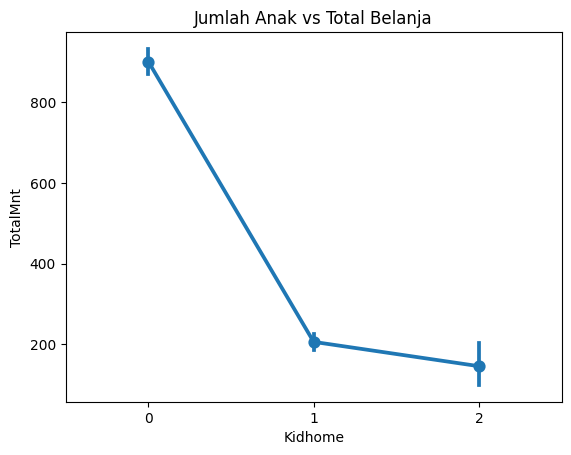

In [32]:
sns.pointplot(x='Kidhome', y='TotalMnt', data = df)
plt.title('Jumlah Anak vs Total Belanja')
plt.show()

In [33]:
Teencorr1 = df['Teenhome'].corr(df['MntWines'])
Teencorr2 = df['Teenhome'].corr(df['MntFruits'])
Teencorr3 = df['Teenhome'].corr(df['MntMeatProducts'])
Teencorr4 = df['Teenhome'].corr(df['MntFishProducts'])
Teencorr5 = df['Teenhome'].corr(df['MntSweetProducts'])
Teencorr6 = df['Teenhome'].corr(df['MntGoldProds'])
Teencorr7 = df['Kidhome'].corr(df['TotalMnt'])
print ('Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Wine adalah', Teencorr1,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Buah adalah', Teencorr2,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Daging adalah', Teencorr3,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Ikan adalah', Teencorr4,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Manis adalah', Teencorr5,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Emas adalah', Teencorr6,
        '\nHubungan antara jumlah remaja dengan jumlah total yang dibelanjakan adalah', Teencorr7)

Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Wine adalah 0.005409455813927772 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Buah adalah -0.17595073775289194 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Daging adalah -0.2608204562941841 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Ikan adalah -0.2038997887697162 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Manis adalah -0.16221842908493975 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Emas adalah -0.020186242307633346 
Hubungan antara jumlah remaja dengan jumlah total yang dibelanjakan adalah -0.5569016676873223


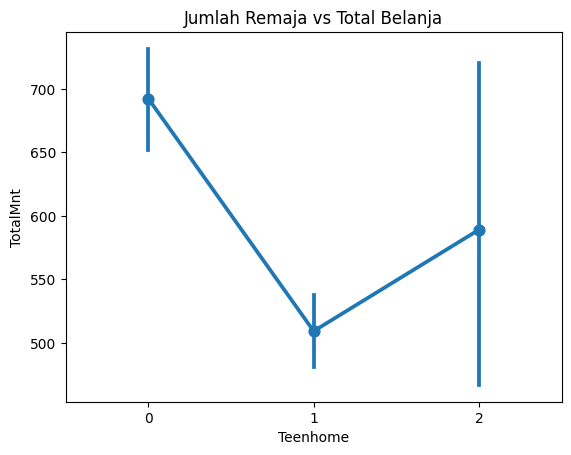

In [34]:
sns.pointplot(x='Teenhome', y='TotalMnt', data = df)
plt.title('Jumlah Remaja vs Total Belanja')
plt.show()

Dari hasil analysis correlation di atas, dapat disimpulkan bahwa jumlah anak atau remaja dalam rumah hanya memiliki hubungan sedang dengan jumlah belanja. Dan tidak ada kategori belanja khusus yang memiliki hubungan signifikan dengan jumlah anak maupun remaja. Sedangkan dari [USAToday](https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.usatoday.com/story/money/2024/01/20/average-grocery-cost-per-week-us-states/72260684007/%23:~:text%3DThe%2520average%2520family%2520spends%2520about,more%2520than%2520families%2520without%2520kids.&ved=2ahUKEwidhpi16r-JAxVSzjgGHZ6KAJUQFnoECBYQAw&usg=AOvVaw0u_5H2Pdf-0rTuSEXCRodj), biaya untuk keluarga yang memiliki anak harusnya lebih tinggi 41% lebih tinggi daripada keluarga tanpa anak.

Hal ini bisa terjadi karena beberapa faktor, diantaranya :
* 1. Kurang nya produk untuk anak-anak.
* 2. Supermarket memiliki fokus target orang dewasa saja.

Apabila opsi 1 yang terjadi, maka akan lebih baik apabila kedepannya supermarket menambah produk untuk anak-anak, sehingga kita bisa meningkatkan revenue.

**Effect of Total Pax on Spending**

Kita akan menganalisa hubungan antara jumlah orang dalam rumah tangga dengan jumlah yang dibelanjakan dalam 2 tahun terakhir ini dengan menggunakan metode Correlation Analysis.

In [35]:
conditions = [
    (df['Marital_Status'] == 'Single'),
    (df['Marital_Status'] == 'Seperated'),
    (df['Marital_Status'] == 'Married'),
    (df['Marital_Status'] == 'Together')]

values = [1, 1, 2, 2]

df['TotalPax'] = np.select(conditions, values) + df['Kidhome'] + df['Teenhome']

In [36]:
TPcorr1 = df['TotalPax'].corr(df['MntWines'])
TPcorr2 = df['TotalPax'].corr(df['MntFruits'])
TPcorr3 = df['TotalPax'].corr(df['MntMeatProducts'])
TPcorr4 = df['TotalPax'].corr(df['MntFishProducts'])
TPcorr5 = df['TotalPax'].corr(df['MntSweetProducts'])
TPcorr6 = df['TotalPax'].corr(df['MntGoldProds'])
TPcorr7 = df['TotalPax'].corr(df['TotalMnt'])
print ('Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Wine adalah', TPcorr1,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Buah adalah', TPcorr2,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Daging adalah', TPcorr3,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Ikan adalah', TPcorr4,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Manis adalah', TPcorr5,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Emas adalah', TPcorr6,
        '\nHubungan antara jumlah remaja dengan jumlah total yang dibelanjakan adalah', TPcorr7)

Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Wine adalah -0.29530620474142966 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Buah adalah -0.34050427926152477 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Daging adalah -0.42706491327200546 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Ikan adalah -0.36199573697280274 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Manis adalah -0.32812818229379265 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Emas adalah -0.23604400293100047 
Hubungan antara jumlah remaja dengan jumlah total yang dibelanjakan adalah -0.42354107312565675


In [37]:
df['TotalPax'].value_counts()

TotalPax
3    889
2    761
4    301
1    254
5     32
Name: count, dtype: int64

In [38]:
df[['TotalPax', 'TotalMnt']].groupby('TotalPax').mean().sort_values('TotalMnt', ascending = False).reset_index()

,TotalPax,TotalMnt
0,1,1105.401575
1,2,785.584757
2,3,440.573678
3,5,308.531250
4,4,248.847176


In [39]:
df[['TotalPax', 'Marital_Status', 'TotalMnt']].groupby(['TotalPax', 'Marital_Status']).mean().sort_values(['TotalPax', 'TotalMnt'], ascending = False).reset_index()

,TotalPax,Marital_Status,TotalMnt
0,5,Married,314.705882
1,5,Together,301.533333
2,4,Single,263.437500
3,4,Married,253.023810
4,4,Together,247.446429
5,4,Seperated,93.200000
6,3,Married,492.928731
7,3,Together,458.270903
8,3,Seperated,267.848485
9,3,Single,208.586667


Dari hasil analysis di atas, dapat disimpulkan bahwa jumlah orang dalam rumah hanya memiliki hubungan sedang dengan jumlah belanja. Dan tidak ada kategori belanja khusus yang memiliki hubungan signifikan dengan jumlah orang. Serupa dengan hasil analisa data diatas. Tetapi, seharusnya makin banyak orang dalam rumah tangga, lebih banyak pengeluaran yang diperlukan.

Hal ini bisa terjadi karena beberapa faktor yang sama dari kasus sebelum nya, diantaranya :
* 1. Kurang nya produk untuk anak-anak atau keluarga.
* 2. Supermarket memiliki fokus target orang dewasa saja.

Apabila opsi 1 yang terjadi, maka akan lebih baik apabila kedepannya supermarket menambah produk dengan kemasan lebih besar, sehingga kita bisa meningkatkan revenue.

**Age and Product Spending Relationship**

Kita akan menganalisa hubungan antara umur dan Total jumlah yang dibelanjakan dalam 2 tahun terakhir dengan menggunakan metode Linear Regression.

In [40]:
x = (2014 - df[['Year_Birth']])
y = df['TotalMnt']

model = LinearRegression()

model.fit(x, y)
r2_score = model.score(x, y)

print('R-squared value :', r2_score,)

R-squared value : 0.012965125179143833


Dari hasil analisa diatas, dapat disimpulkan bahwa tidak ada hubungan antara umur dan jumlah belanja. 

**Education and Product Spending Relationship**

Kita akan menganalisa hubungan antara pendidikan dan Total jumlah yang dibelanjakan dalam 2 tahun terakhir dengan menggunakan metode Correlation Analysis.

In [41]:
df['Education'].corr(df['TotalMnt'])

np.float64(0.0635281623300951)

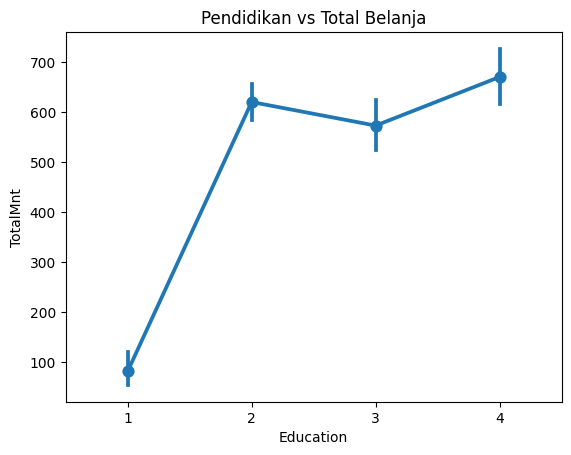

In [42]:
sns.pointplot(x='Education', y='TotalMnt', data = df)
plt.title('Pendidikan vs Total Belanja')
plt.show()

Dari hasil analisa diatas, dapat disimpulkan bahwa tidak ada hubungan antara pendidikan dan jumlah belanja. 

**Marital Status and Product Spending Relationship**

Kita akan menganalisa hubungan antara status pernikahan dan total jumlah yang dibelanjakan dalam 2 tahun terakhir dengan menggunakan metode Correlation Analysis.

In [43]:
df['Marital_Status'].value_counts()

Marital_Status
Married      864
Together     579
Single       486
Seperated    308
Name: count, dtype: int64

In [44]:
df[['Marital_Status', 'TotalMnt']].groupby('Marital_Status').mean().sort_values('TotalMnt', ascending = False).reset_index()

,Marital_Status,TotalMnt
0,Seperated,644.448052
1,Single,607.187243
2,Together,606.238342
3,Married,590.802083


<Axes: ylabel='TotalMnt'>

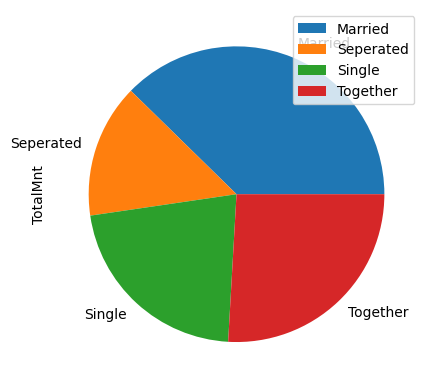

In [45]:
df.groupby(['Marital_Status']).sum().plot(kind='pie', y='TotalMnt')

Dari hasil analisa di atas, dapat disimpulkan bahwa pengunjung supermarket paling banyak adalah yang sudah menikah, tetapi merupakan rata-rata yang terendah pula.

**Income and Product Spending Relationship**

Kita akan menganalisa hubungan antara Pemasukan dan total jumlah yang dibelanjakan dalam 2 tahun terakhir dengan menggunakan metode Correlation Analysis.

In [46]:
Inccorr1 = df['Income'].corr(df['MntWines'])
Inccorr2 = df['Income'].corr(df['MntFruits'])
Inccorr3 = df['Income'].corr(df['MntMeatProducts'])
Inccorr4 = df['Income'].corr(df['MntFishProducts'])
Inccorr5 = df['Income'].corr(df['MntSweetProducts'])
Inccorr6 = df['Income'].corr(df['MntGoldProds'])
Inccorr7 = df['Income'].corr(df['TotalMnt'])
print ('Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Wine adalah', Inccorr1,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Buah adalah', Inccorr2,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Daging adalah', Inccorr3,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Ikan adalah', Inccorr4,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Manis adalah', Inccorr5,
        '\nHubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Emas adalah', Inccorr6,
        '\nHubungan antara jumlah remaja dengan jumlah total yang dibelanjakan adalah', Inccorr7)

Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Wine adalah 0.7174949145442188 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Buah adalah 0.5278164916019951 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Daging adalah 0.6853536630735186 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Ikan adalah 0.5421817368850783 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Manis adalah 0.538532013052597 
Hubungan antara jumlah remaja dengan jumlah yang dibelanjakan dalam kategori Emas adalah 0.40422426727887867 
Hubungan antara jumlah remaja dengan jumlah total yang dibelanjakan adalah 0.8141947480514595


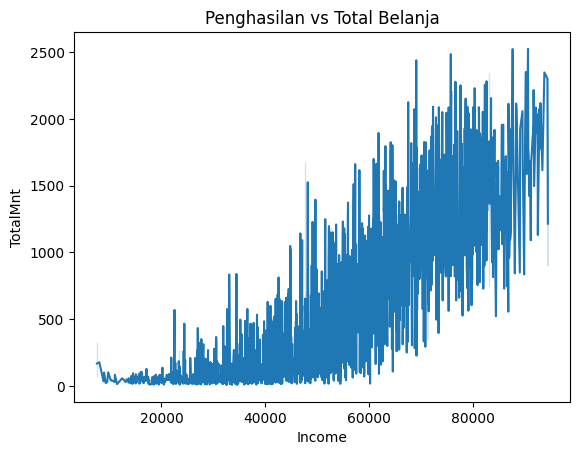

In [47]:
sns.lineplot(x='Income', y='TotalMnt', data = df)
plt.title('Penghasilan vs Total Belanja')
plt.show()

Dari hasil analisa diatas, dapat disimpilakan bahwa penghasilan memiliki nilai correlasi yang tinggi terhadap jumlah belanja, dimana itu masuk di akal, karena dengan lebih banyak penghasilan, pasti lebih tinggi daya beli customer tersebut. Kita juga dapat menyimpulkan wine merupakan salah satu kategori yang memiliki hubungan yang cukup tinggi dengan penghasilan.

Dari hasil analisa diatas, dapat disimpilakan bahwa umur, pendidikan dan status pernikahan tidak memiliki hubungan yang signifikan terhadap jumalah belanja, hanya penghasilan yang berpengaruh terhadap jumlah belanja. Wajar jika pendidikan dan umur tidak berpengaruh pada jumlah belanja, tetapi status pernikahan seharusnya memiliki hubungan dengan jumlah belanja, karena dengan bertambah nya orang dalam sebuah rumah tangga, harusnya jumlah belanja juga bertambah.

Seperti halnya dengan hasil analisis sebelumnya, ini dapat disebabkan oleh faktor yang seupa, diantaranya :
* 1. Kurang nya produk untuk pasangan.
* 2. Supermarket memiliki fokus target orang single saja.

Apabila opsi 1 yang terjadi, maka akan lebih baik apabila kedepannya supermarket menambah produk dengan kemasan lebih besar, sehingga kita bisa meningkatkan revenue.

### **2 Recency and Customer Engagement**

Disini kita akan menganalisa recency (jumlah hari terakhir berbelanja) dan complain customer. Dari analisis ini, kita dapat menjawab pertanyaan dibawah ini:
* Apakah pelanggan yang baru belanja, belanja lebih banyak atau lebih sedikit dibandingkan dengan pelanggan yang sudah lama belom belanja?
* Faktor apa yang mempengaruhi kemungkinan pelanggan untuk complain?

**Recency and Customer Spending Correlation**

Kita akan menganalisa apakah ada hubungan antara sering atau jarang nya seseorang datang berbelanja denganjumlah belanjaan nya menggunakan Correlation Analysis.

In [48]:
ReMntdf = df[['Recency', 'TotalMnt']].groupby('Recency').mean().reset_index()
ReMntdf

,Recency,TotalMnt
0,0,450.035714
1,1,661.000000
2,2,618.928571
3,3,637.448276
4,4,664.925926
...,...,...
95,95,740.736842
96,96,635.360000
97,97,575.500000
98,98,855.181818


In [49]:
ReMntdf['Recency'].corr(ReMntdf['TotalMnt'])

np.float64(0.11900785178982809)

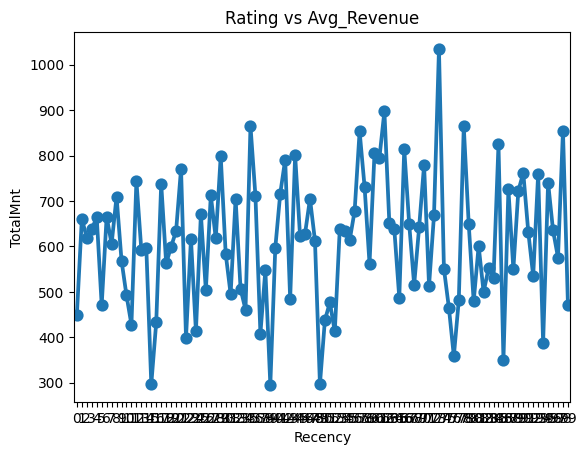

In [50]:
sns.pointplot(x='Recency', y='TotalMnt', data = ReMntdf)
plt.title('Rating vs Avg_Revenue')
plt.show()

Dari hasil di atas, dapat disimpulkan bahwa tidak ada hubungan antara kedua faktor.

**Factors Influencing Complaints**

Kita akan menganalisa kemungkinan komplain berdasarkan demografik dan belanjaan.

In [51]:
df['Complain'].value_counts()

Complain
0    2217
1      20
Name: count, dtype: int64

In [52]:
count_comp = len(df[df['Complain'] == 1])
count_Ncomp = len(df[df['Complain'] == 0])
print ('Persentas complain yang di terima adalah', (count_comp/(count_comp+count_Ncomp)*100))

Persentas complain yang di terima adalah 0.8940545373267769


Meskipun persentase komplain hanya dibawah 1%, kita akan menganalisa lebih lanjut kemungkinan komplain berdasarkan demografik.

In [53]:
dfcomp = df[df['Complain'] == 1]
dfcomp.describe()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,TotalMnt,TotalPax
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,...,20.0,20.0,20.000000,20.0,20.000000,20.000000,20.0,20.000000,20.000000,20.000000
mean,6667.400000,1968.350000,2.350000,45672.400000,0.650000,0.550000,176.700000,25.100000,117.70000,26.700000,...,0.0,0.0,0.100000,0.0,0.050000,0.150000,1.0,50.750000,392.000000,2.850000
std,3390.767735,15.044758,0.587143,19618.595911,0.587143,0.604805,211.112118,39.131223,162.23216,38.729969,...,0.0,0.0,0.307794,0.0,0.223607,0.366348,0.0,27.196894,437.239787,0.875094
min,255.000000,1943.000000,2.000000,15716.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,8.000000,11.000000,1.000000
25%,4247.750000,1954.750000,2.000000,36277.500000,0.000000,0.000000,16.750000,1.000000,14.00000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,30.250000,52.750000,2.000000
50%,6736.000000,1970.000000,2.000000,39341.000000,1.000000,0.500000,34.000000,6.000000,32.50000,6.500000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,48.500000,95.500000,3.000000
75%,9604.000000,1979.500000,3.000000,59853.000000,1.000000,1.000000,310.750000,31.250000,171.00000,45.750000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,68.750000,667.250000,3.000000
max,10995.000000,1995.000000,4.000000,83257.000000,2.000000,2.000000,629.000000,137.000000,590.00000,104.000000,...,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.0,93.000000,1365.000000,5.000000


In [54]:
df.groupby(['Complain']).mean(numeric_only = True)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Recency,TotalMnt,TotalPax
Complain,,,,,,,,,,,,,,,,,,,,,
0,5581.013532,1968.906631,2.667569,51820.386014,0.44249,0.506089,305.143888,26.28101,167.360848,37.620659,...,2.326116,0.064953,0.013532,0.072621,0.075327,0.072621,0.149301,49.089761,607.671628,2.593595
1,6667.400000,1968.350000,2.350000,45672.400000,0.65000,0.550000,176.700000,25.10000,117.700000,26.700000,...,2.400000,0.000000,0.000000,0.100000,0.000000,0.050000,0.150000,50.750000,392.000000,2.850000


<Axes: ylabel='Complain'>

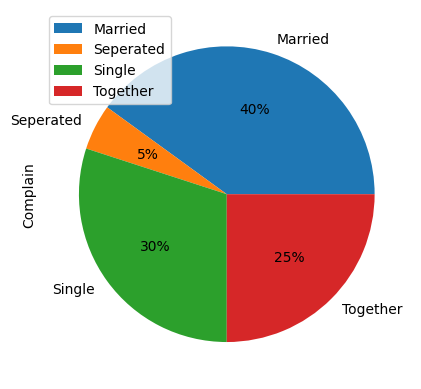

In [55]:
dfcomp.groupby(['Marital_Status']).count().plot(kind = 'pie', y = 'Complain', autopct='%1.0f%%')

<Axes: ylabel='Complain'>

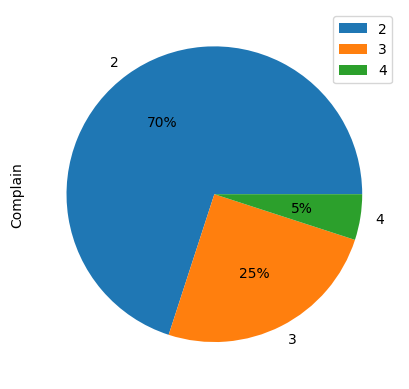

In [56]:
dfcomp.groupby(['Education']).count().plot(kind = 'pie', y = 'Complain', autopct='%1.0f%%')

Dari grafik-grafik diatas, kita dapat menyimpulkan bahwa hanya dibawah 1% dari customers yang komplain. Customer yang komplain memiliki karakteristik pendidikan tingkat 2 yaitu sarjana, sudah menikah dengan rata-rata penghasilan serta jumlah belanja yang lebih rendah dibandingkan customer yang tidak komplain. Dengan ini, kita bisa menyimpulkan bahwa yang komplain hanya minority dan daya beli juga tidak tinggi, sehingga tidak memiliki urgency untuk di tindak lanjutkan.

### **3 Promotions and Campaigns**

Disini kita akan menganalisa keefektifitas Promosi dan pengaruh ke Promosi di masa depan dengan menggunakan metode Chi-square test dan Logistic Regression test. Dari analisis ini, kita dapat menjawab pertanyaan dibawah ini :
* Promosi manakah yang paling berhasil dalam mengonversi pelanggan?
* Bagaimana penerimaan tawaran sebelumnya mempengaruhi tanggapan Promosi di masa depan?

**Success of Promotional Campaigns**

In [57]:
for i in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'] : 
    x = df[df[i] == 1]['NumDealsPurchases'].sum()
    print ('Jumlah belanja dengan promosi', i, 'adalah', x)

Jumlah belanja dengan promosi AcceptedCmp1 adalah 204
Jumlah belanja dengan promosi AcceptedCmp2 adalah 51
Jumlah belanja dengan promosi AcceptedCmp3 adalah 353
Jumlah belanja dengan promosi AcceptedCmp4 adalah 406
Jumlah belanja dengan promosi AcceptedCmp5 adalah 172
Jumlah belanja dengan promosi Response adalah 780


In [58]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df[df['TotalAcceptedCmp'] == 0].describe()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,TotalMnt,TotalPax,TotalAcceptedCmp
count,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,...,1629.0,1629.0,1629.0,1629.0,1629.0,1629.000000,1629.000000,1629.000000,1629.000000,1629.0
mean,5655.955187,1969.123389,2.634745,48107.450847,0.499693,0.548803,216.955187,22.763045,125.901780,32.102517,...,0.0,0.0,0.0,0.0,0.0,0.010436,50.882750,458.618171,2.712707,0.0
std,3275.651569,11.472117,0.832270,19157.945296,0.551550,0.543766,257.948719,37.030671,187.712409,49.967101,...,0.0,0.0,0.0,0.0,0.0,0.101653,28.643884,493.858706,0.875389,0.0
min,0.000000,1940.000000,1.000000,7563.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.000000,1.000000,0.0
25%,2853.000000,1960.000000,2.000000,33279.000000,0.000000,0.000000,18.000000,1.000000,12.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,27.000000,55.000000,2.000000,0.0
50%,5562.000000,1970.000000,2.000000,47353.000000,0.000000,1.000000,98.000000,6.000000,45.000000,10.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,51.000000,235.000000,3.000000,0.0
75%,8566.000000,1977.000000,3.000000,63516.000000,1.000000,1.000000,359.000000,26.000000,161.000000,38.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,76.000000,805.000000,3.000000,0.0
max,11191.000000,1995.000000,4.000000,94461.440000,2.000000,2.000000,1396.000000,199.000000,1725.000000,259.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,99.000000,2440.000000,5.000000,0.0


In [59]:
df[df['TotalAcceptedCmp'] > 0].describe()

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency,TotalMnt,TotalPax,TotalAcceptedCmp
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,...,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,5415.960526,1968.307566,2.745066,61566.128888,0.296053,0.393092,537.200658,35.667763,276.807566,52.046053,...,0.049342,0.268092,0.274671,0.266447,0.549342,0.004934,44.340461,999.932566,2.282895,1.644737
std,3157.869666,12.286495,0.854762,21202.625055,0.471093,0.530846,405.011732,44.846671,276.531406,63.335028,...,0.216760,0.443331,0.446716,0.442465,0.497969,0.070128,29.271904,682.937902,0.917828,0.975197
min,1.000000,1941.000000,1.000000,7563.360000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.000000
25%,2764.500000,1958.000000,2.000000,45198.000000,0.000000,0.000000,158.750000,3.000000,45.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,345.000000,2.000000,1.000000
50%,5243.000000,1969.500000,2.000000,64500.500000,0.000000,0.000000,508.500000,19.000000,161.000000,23.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,41.000000,1031.000000,2.000000,1.000000
75%,8018.500000,1977.000000,4.000000,79593.000000,1.000000,1.000000,891.500000,49.250000,447.000000,80.500000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,69.000000,1574.000000,3.000000,2.000000
max,11133.000000,1996.000000,4.000000,94461.440000,2.000000,2.000000,1493.000000,193.000000,1607.000000,253.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,2525.000000,5.000000,5.000000


In [60]:
conversion_rates = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()  # This gives the mean of each column (acceptance rate)

conversion_df = pd.DataFrame(conversion_rates, columns=['conversion_rate']).reset_index()
conversion_df.columns = ['campaign', 'conversion_rate']

print(conversion_df)


       campaign  conversion_rate
0  AcceptedCmp1         0.064372
1  AcceptedCmp2         0.013411
2  AcceptedCmp3         0.072865
3  AcceptedCmp4         0.074654
4  AcceptedCmp5         0.072418
5      Response         0.149307


In [61]:
from scipy.stats import chi2_contingency

contingency_table = pd.DataFrame({
    'Accepted': df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(),
    'Not Accepted': df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].shape[0] - df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum()
})

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


Chi-square Statistic: 306.17546353244245
P-value: 4.7083158053856826e-64
Degrees of Freedom: 5
Expected Frequencies:
 [[ 166.66666667 2070.33333333]
 [ 166.66666667 2070.33333333]
 [ 166.66666667 2070.33333333]
 [ 166.66666667 2070.33333333]
 [ 166.66666667 2070.33333333]
 [ 166.66666667 2070.33333333]]


Dari hasil analisis di atas, kita dapat menyimpulkan bahwa promosi yang lebih effectif adalah promosi terakhir, yaitu 15%, lalu diikuti oleh promosi 3, 4, dan 5 yaitu 7%.

Kita juga dapan menyimpulkan bahwa tidak terdapat hubungan yang signifikan antara penerimaan kampanye (P-value > 0.05), yang menunjukkan bahwa kampanye tersebut independen satu sama lain. Anda akan menerima hipotesis nol, yang menyatakan bahwa efektivitas suatu kampanye mungkin mempengaruhi penerimaan kampanye lainnya.

**Previous Acceptance Influence on Future Responses**

In [62]:
features = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]
target = df['Response']

logistic_data = pd.concat([features, target], axis=1)
logistic_data.columns = ['past_1', 'past_2', 'past_3', 'past_4', 'past_5', 'future']
print(logistic_data.head())


   past_1  past_2  past_3  past_4  past_5  future
0       0       0       0       0       0       1
1       0       0       0       0       0       0
2       0       0       0       0       0       0
3       0       0       0       0       0       0
4       0       0       0       0       0       0


In [63]:

X = sm.add_constant(logistic_data[['past_1', 'past_2', 'past_3', 'past_4', 'past_5']])
y = logistic_data['future']

model = sm.Logit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.348767
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 future   No. Observations:                 2237
Model:                          Logit   Df Residuals:                     2231
Method:                           MLE   Df Model:                            5
Date:                Tue, 05 Nov 2024   Pseudo R-squ.:                  0.1726
Time:                        05:41:34   Log-Likelihood:                -780.19
converged:                       True   LL-Null:                       -942.91
Covariance Type:            nonrobust   LLR p-value:                 3.395e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3829      0.082    -29.034      0.000      -2.544      -2.222
past_1         1.3166      0.

Dari hasil analisa, kita dapat menarik beberapa informasi, yaitu :

const (konstan):
Intersepnya adalah -0,693, yang menunjukkan peluang log untuk menerima last campaign ketika semua Promosi sebelumnya ditolak (semua prediktor sebelumnya adalah 0) adalah 0 (exp(-2,38 ≈ 0,09)).

* past_1:

Koefisien: 1,3166
Interpretasi: Penerimaan campaign_1 meningkatkan peluang menerima last campaign sebesar 3,7 kali (exp(1,3166) ≈  3,73) dibandingkan bukan penerima campaign_1 . Nilai p (0,000) menunjukkan pengaruh ini sangat signifikan secara statistik.

* past_2:

Koefisien: 0,9571
Interpretasi: Penerimaan campaign_2 meningkatkan peluang penerimaan last campaign sebesar 2,6 kali (exp(0,9571) ≈ 2,60) dibandingkan bukan penerima campaign_2. Nilai p (0,051) menunjukkan pengaruh ini sedikit signifikan secara statistik.

* past_3:

Koefisien: 1,8944
Interpretasi: Penerimaan campaign_3 meningkatkan kemungkinan menerima last campaign sebesar 6,6 kali (exp(1,8944) ≈ 6,65) dibandingkan bukan penerima campaign_3, menunjukkan pengaruh yang sangat kuat dengan nilai p yang sangat signifikan (0,000).

* past_4:

Koefisien: 0,6933
Interpretasi: Penerimaan campaign_4 meningkatkan kemungkinan menerima last campaign sebesar 2 kali (exp(0,6933) ≈ 2,00) dibandingkan bukan penerima campaign_4, menunjukkan pengaruh yang kuat dengan nilai p yang sangat signifikan (0,002).

* past_5:

Koefisien: 1,6056
Interpretasi: Penerimaan campaign_3 meningkatkan kemungkinan menerima last campaign hampir 5 kali (exp(1,6056) ≈ 4,98) dibandingkan bukan penerima last campaign, menunjukkan pengaruh yang sangat kuat dengan nilai p yang sangat signifikan (0,000).

Kesimpulan
Secara keseluruhan, analisis regresi logistik ini menunjukkan bahwa penerimaan semua Promosi di masa lalu berpengaruh positif terhadap kemungkinan penerimaan Promosi terakhir. Model ini memberikan wawasan tentang efektivitas Promosi sebelumnya dalam memprediksi respons di masa depan, membantu pengambilan keputusan strategis untuk upaya pemasaran di masa depan.

### **4 Channel Preferences**

Disini kita akan menganalisis Saluran belanja mana yang digemari customer. Dari analisis ini, kita dapat menjawab pertanyaan dibawah ini:
* Apakah customer lebih gemar berbelanja langsung di toko, melalui katalog atau melalui online shopping?
* Bagaimana hubungan antara pengunjung website dengan pengunjung yang berbelanja di website?

**Preferred Shopping Channel**

In [64]:
df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].describe()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2237.000000,2237.000000,2237.000000
mean,4.087170,2.662494,5.794367
std,2.779461,2.923456,3.250940
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000
50%,4.000000,2.000000,5.000000
75%,6.000000,4.000000,8.000000
max,27.000000,28.000000,13.000000


Text(0.5, 1.0, 'Total Jumlah Belanja pada masing-masing saluran belanja')

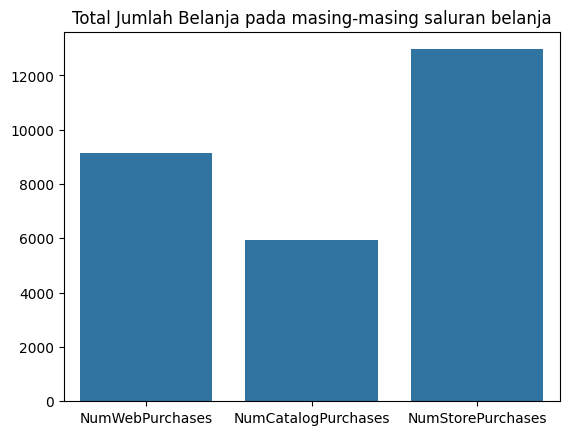

In [65]:
sns.barplot(df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum())
plt.title('Total Jumlah Belanja pada masing-masing saluran belanja')

In [66]:
x = df[['NumStorePurchases']].sum()[0] / (df[['NumStorePurchases']].sum()[0] + df[['NumCatalogPurchases']].sum()[0] + df[['NumWebPurchases']].sum()[0]) * 100
y = df[['NumCatalogPurchases']].sum()[0] / (df[['NumStorePurchases']].sum()[0] + df[['NumCatalogPurchases']].sum()[0] + df[['NumWebPurchases']].sum()[0]) * 100
z = df[['NumWebPurchases']].sum()[0] / (df[['NumStorePurchases']].sum()[0] + df[['NumCatalogPurchases']].sum()[0] + df[['NumWebPurchases']].sum()[0]) * 100
print ('Persentase orang berbelanja di toko langsung adalah', x)
print ('Persentase orang berbelanja melalui katalog adalah', y)
print ('Persentase orang berbelanja di website (online) adalah', z)

Persentase orang berbelanja di toko langsung adalah 46.19222408324721
Persentase orang berbelanja melalui katalog adalah 21.22518798332205
Persentase orang berbelanja di website (online) adalah 32.58258793343074


Dapat dilihat dari grafik di atas bahwa banyak customer cedrung berbelanja langsung di toko, diikuti dengan berbelanja online, lalu berbelanja melalui katalog. Tetapi perlu diingat bahwa toko fisik memiliki biaya operational yang lebih tinggi dibandingkan dengan ssaluran lain. Dan meskipun katalog memiliki customer yang paling sedikit, dan tetap memerlukan biaya operational yg lebih tinggi (biaya fotografi, design, keatifitas, percetakan dan bnyk lagi) daripada online, namun menurut [lumen](https://courses.lumenlearning.com/wm-retailmanagement/chapter/comparison-of-store-catalog-and-internet-channels/#footnote-1750-1), para retailers seperti Costco, Nordstrom, William-Sonoma, dan lainnya digabung, mengirimkan lebih dari 10 Miliyar katalog per tahun ke berbagai daerah di America. Dilansir pada nytimes oleh [Rebecca R. Ruiz](https://www.nytimes.com/2015/01/26/business/media/catalogs-after-years-of-decline-are-revamped-for-changing-times.html?_r=0) bahwa 75% dari customer melihat katalog terlebih dahulu sebelum berbelanja.

**Online Engagement vs. Purchases**

In [67]:
x = df[['NumWebVisitsMonth']]
y = df['NumWebPurchases']

model = LinearRegression()

model.fit(x, y)
r2_score = model.score(x, y)

print('R-squared value :', r2_score,)

R-squared value : 0.0031641183592309163


Dari hasil analisis, bisa di lihat bahwa tidak ada hubungan antara pengunjung website dengan belanja online.

### **5 Customer Segments Likely to Increase Spending**

Disini kita akan menganalisa karakteristik apa yang mungkin akan meningkatkan jumlah belanja dengan Predictive modeling. Dari analisis ini, kita dapat menjawab pertanyaan dibawah ini:
* Segmen pelanggan manakah yang paling mungkin meningkatkan belanjaan customer dengan pemasaran yang ditargetkan?

**Customer Segments Likely to Increase Spending**

In [68]:
features = ['Year_Birth', 'Education', 'Income', 'Kidhome', 
            'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df['High_Potential'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1) > 500).astype(int)

X = df[features].copy()
y = df['High_Potential']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [70]:
y_pred = rf_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


[[238   4]
 [  3 203]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       242
           1       0.98      0.99      0.98       206

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



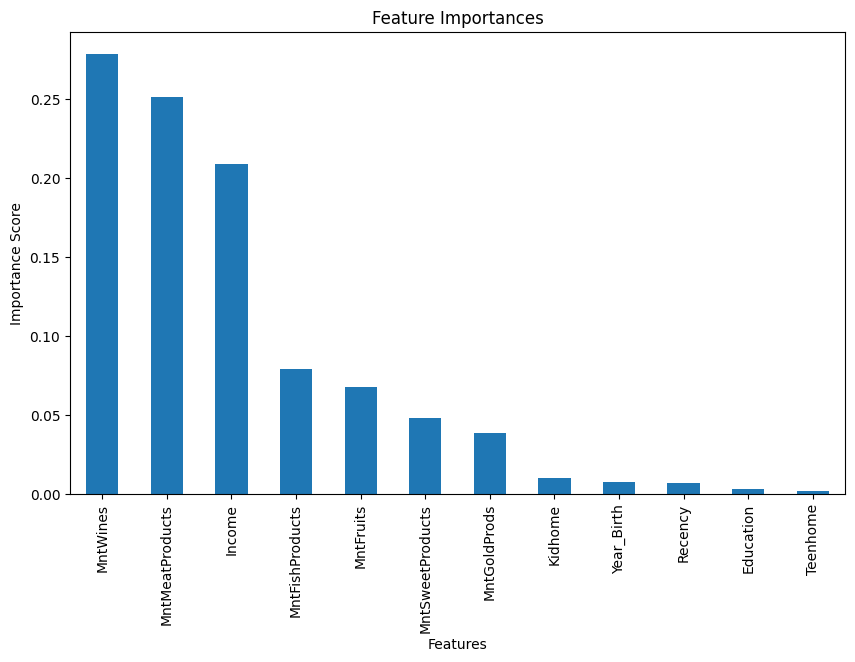

In [71]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


Dari hasil analisis ini, dapat dilihat bahwa segmen wine, daging dan penghasilan menjadi target pemasaran yang memungkinkan peningkatan belanja customer.

In [72]:
df.to_csv('Supermarket Customers Final.csv', index = False)

## **Conclusion and Recomendation**

Dari hasil analisis, kita dapat mengambil kesimpulan berikut tentang customer supermarket:
* Jumlah orang dalam rumah tangga tidak berpengaruh pada jumlah belanjaan.
* Faktor yang paling berpengaruh pada jumlah belanja adalah penghasilan.
* Wine merupakan segment dengan jumlah belanja paling banyak.
* Majoritas customer supermarket adalah orang yang sudah menikah, berpasangan atau berkeluarga.
* Sering atau jarang nya customer berbelanja tidak mempengaruhi jumlah belanja.
* Dari 2237 data yang terkumpulkan, hanya 20 (kurang dari 1%) komplain yang diterima.
* Promosi terakhir (last campaign) persentase diterima paling tinggi yaitu 15%.
* Pelanggan yang telah menerima tawaran sebelum nya cendrung menerima tawaran kedepannya.
* 46% customer berbelanja langsung di toko sedangkan hanya 32% belanja online dan 21% melalui katalog.

Berdasarkan analisis yang telah dilakukan, berikut beberapa rekomendasi untuk supermarket:

* Fokus pada Promosi Produk Wine: Karena wine merupakan segment dengan jumlah belanja paling banyak, pertimbangkan untuk meningkatkan promosi, menawarkan diskon, atau menyelenggarakan acara tasting wine untuk menarik lebih banyak pelanggan.
* Kampanye Berdasarkan Penghasilan: Mengingat penghasilan berpengaruh besar terhadap jumlah belanja, kembangkan kampanye yang ditargetkan berdasarkan segmentasi penghasilan. Misalnya, tawarkan produk premium untuk segmen berpenghasilan tinggi dan produk dengan harga lebih terjangkau untuk segmen berpenghasilan rendah.
* Program Loyalitas untuk Pasangan: Karena mayoritas customer adalah orang yang sudah menikah atau berpasangan, buat program loyalitas atau penawaran khusus yang menarik bagi mereka, seperti diskon untuk pembelian bersama atau hadiah untuk pasangan.
* Menambahkan Produk untuk Keluarga: Mengingat sebagian besar customer adalah orang yang sudah berkeluarga, maka tambahkan produk yang sesuai untuk keluarga (contoh : beras 5kg atau 10kg, bukan hanya kemasan1kg) dan juga untuk anak-anak (susu formula, popok bayi, makanan ringan) untuk meningkatkan penjualan.
* Tawarkan Tawaran Berulang: Karena pelanggan yang telah menerima tawaran sebelumnya cenderung menerima tawaran selanjutnya, ciptakan siklus tawaran yang menarik dan relevan untuk mendorong pembelian berulang.
* Peningkatan Pengalaman Berbelanja di Toko: Mengingat lebih banyak pelanggan berbelanja langsung di toko, perbaiki pengalaman berbelanja di toko dengan menciptakan suasana yang nyaman, menawarkan layanan pelanggan yang baik, dan memanfaatkan promosi di lokasi.
Dengan menerapkan rekomendasi ini, supermarket dapat meningkatkan kepuasan pelanggan dan mendorong pertumbuhan penjualan.
